# 基礎集計

**このノートブックでやること**
* 基礎集計、可視化

## インポート

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font=['IPAMincho'])

## イベントデータ読み込み

In [2]:
input_dir = '../event_data/'

In [3]:
df = pd.read_pickle(input_dir + 'a3_output_df.pkl')
df

,イベント,1位,2001位,形式,日付,属性,期間
0,Stage Bye Stage,240778,178840,Carnival,2019-07-02,NaN,NaN
1,TRUE COLORS,254095,176743,Carnival,2019-08-31,NaN,NaN
2,夢をのぞいたら,286410,210672,Carnival,2020-01-01,NaN,NaN
3,夢色ハーモニー,363877,45587,Groove,2015-10-31,Vo,198.0
4,流れ星キセキ,405805,48673,Groove,2015-12-04,Vo,222.0
...,...,...,...,...,...,...,...
90,Athanasia,1130000,75775,アタポン,2020-04-20,NaN,174.0
91,不埒なCANVAS,1271125,188652,アタポン,2020-05-19,NaN,198.0
92,Sing the Prologue♪,1123140,85574,アタポン,2020-06-19,NaN,174.0
93,太陽の絵の具箱,1120703,107142,アタポン,2020-07-20,NaN,174.0


## 基礎集計・可視化

### 形式

In [4]:
# 形式別
# --Carnival--
# データ3つのみ
# - 1位: 1番低い
# - 2001位: 平均値が他2つの2倍くらい
# - 期間: データなし
# --Groove--
# - 1位: 2番目
# - 2001位: 全体的に一番低め。中央値 < 平均値。
# - 期間: 半分以上は174。
# --アタポン--
# - 1位: 全体的に1番大きい
# - 2001位: 3つの形式では真ん中。中央値 < 平均値。
# - 期間: minはGrooveより小さく、maxはGrooveより大きい
df.groupby('形式').describe().T

形式                Carnival        Groove          アタポン
1位    count       3.000000  3.200000e+01  6.000000e+01
      mean   260427.666667  7.275876e+05  8.514374e+05
      std     23465.865770  2.780502e+05  2.409591e+05
      min    240778.000000  3.241480e+05  3.243690e+05
      25%    247436.500000  4.838600e+05  6.985632e+05
      50%    254095.000000  6.583330e+05  8.349745e+05
      75%    270252.500000  9.960450e+05  9.757640e+05
      max    286410.000000  1.180810e+06  1.424681e+06
2001位 count       3.000000  3.200000e+01  6.000000e+01
      mean   188751.666667  8.704856e+04  9.492438e+04
      std     19012.498845  3.531885e+04  4.234925e+04
      min    176743.000000  4.009600e+04  4.294400e+04
      25%    177791.500000  5.294250e+04  6.751575e+04
      50%    178840.000000  8.456000e+04  8.058950e+04
      75%    194756.000000  1.144580e+05  1.129830e+05
      max    210672.000000  1.700140e+05  2.246970e+05
期間    count       0.000000  3.200000e+01  6.000000e+01
      mean             NaN  1.883438e+02  1.809833e+02
      std              NaN  1.807620e+01  1.930881e+01
      min              NaN  1.740000e+02  1.500000e+02
      25%              NaN  1.740000e+02  1.740000e+02
      50%              NaN  1.740000e+02  1.740000e+02
      75%              NaN  1.980000e+02  1.980000e+02
      max              NaN  2.220000e+02  2.490000e+02

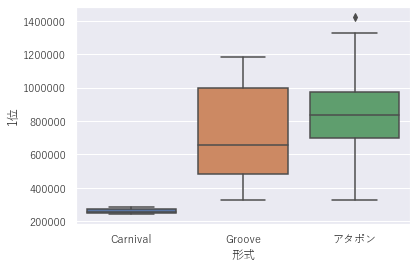

In [6]:
# 形式vs1位ボーダー
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.set(font='Yu Gothic')
sns.boxplot(x='形式', y='1位', data=df, ax=ax)

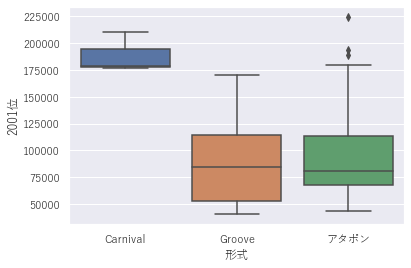

In [7]:
# 形式vs2001位ボーダー
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.set(font='Yu Gothic')
sns.boxplot(x='形式', y='2001位', data=df, ax=ax)

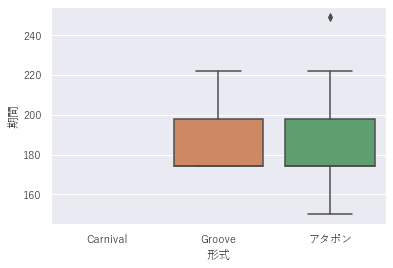

In [8]:
# 形式vs期間
# - Carnivalは期間データなし
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.set(font='Yu Gothic')
sns.boxplot(x='形式', y='期間', data=df, ax=ax)

### 属性

In [9]:
# 属性別
# 属性があるのはGrooveのみ
# --Da--
# - 1位: 平均値は真ん中。最小値は一番大きい。中央値は一番小さい。最大値は一番小さい。
# - 2001位: min, mid, maxすべて一番小さい
# --Vi--
# - 1位: 平均値は一番大きい。最小値は一番小さい。中央値は一番大きい。最大値は一番大きい。
# - 2001位: 全体的に一番大きい。75%値だけ一番小さい
# --Vo--
# - 1位: 平均値は一番小さい。最小値は真ん中。中央値は真ん中。最大値は真ん中。
# - 2001位: 中間くらい。25%値は一番小さい。75%値は一番大きい
df.groupby('属性').describe().T

属性                     Da            Vi            Vo
1位    count  1.000000e+01  1.100000e+01  1.100000e+01
      mean   7.085592e+05  7.749118e+05  6.975620e+05
      std    2.784552e+05  2.719412e+05  3.035029e+05
      min    3.800000e+05  3.241480e+05  3.415070e+05
      25%    5.008332e+05  5.882500e+05  4.301750e+05
      50%    5.866050e+05  7.500000e+05  6.000000e+05
      75%    9.917648e+05  9.883705e+05  1.020828e+06
      max    1.101000e+06  1.180810e+06  1.123331e+06
2001位 count  1.000000e+01  1.100000e+01  1.100000e+01
      mean   8.112020e+04  9.281327e+04  8.667327e+04
      std    3.202402e+04  3.859589e+04  3.718230e+04
      min    4.009600e+04  4.630000e+04  4.254400e+04
      25%    5.476725e+04  6.463950e+04  4.987100e+04
      50%    7.810650e+04  8.214300e+04  1.004760e+05
      75%    1.108992e+05  1.107000e+05  1.188645e+05
      max    1.274820e+05  1.700140e+05  1.400000e+05
期間    count  1.000000e+01  1.100000e+01  1.100000e+01
      mean   1.836000e+02  1.895455e+02  1.914545e+02
      std    1.678094e+01  1.920085e+01  1.886989e+01
      min    1.740000e+02  1.740000e+02  1.740000e+02
      25%    1.740000e+02  1.740000e+02  1.740000e+02
      50%    1.740000e+02  1.770000e+02  1.980000e+02
      75%    1.920000e+02  1.980000e+02  1.980000e+02
      max    2.220000e+02  2.220000e+02  2.220000e+02

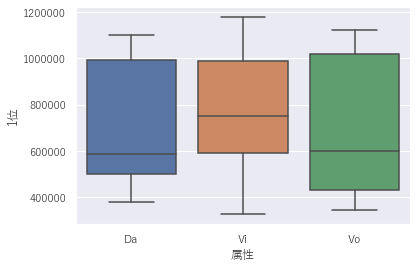

In [10]:
# 属性vs1位ボーダー
# 属性があるのはGrooveのみ
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.set(font='Yu Gothic')
sns.boxplot(x='属性', y='1位', data=df[df['形式']=='Groove'], ax=ax)

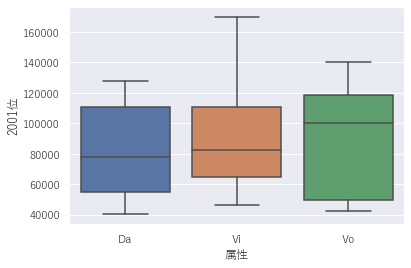

In [11]:
# 属性vs2001位ボーダー
# 属性があるのはGrooveのみ
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.set(font='Yu Gothic')
sns.boxplot(x='属性', y='2001位', data=df[df['形式']=='Groove'], ax=ax)

### 期間

In [14]:
# 数値データの相関行列
# 相関はなさそう
df.corr()

,1位,2001位,期間
1位,1.000000,0.295591,-0.109710
2001位,0.295591,1.000000,-0.126082
期間,-0.109710,-0.126082,1.000000


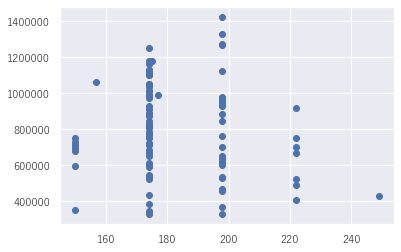

In [15]:
# 期間vs1位ボーダー
# 期間が長いほど高いかと思ったが、そうでもない
fig = plt.figure()
ax = fig.add_subplot(111)
x = df.loc[:, '期間']
y = df.loc[:, '1位']
ax.scatter(x, y)
plt.show()

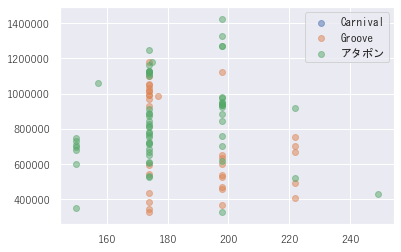

In [16]:
# 期間vs1位ボーダー
# 形式ごとに色分けしてプロット
events = df['形式'].unique()
fig = plt.figure()
ax = fig.add_subplot(111)

for event in events:
    x = df.loc[df['形式'] == event, '期間']
    y = df.loc[df['形式'] == event, '1位']
    ax.scatter(x, y, label=event, alpha=0.5)
    
ax.legend(prop={"family":"MS Gothic"})
plt.show()

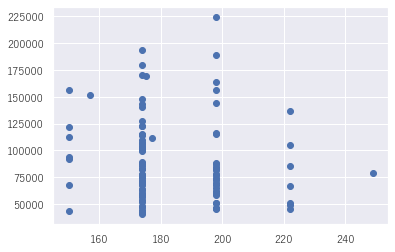

In [17]:
# 期間vs2001位ボーダー
# 期間が長いほどボーダーが高いかと思ったが、そうでもない
fig = plt.figure()
ax = fig.add_subplot(111)
x = df.loc[:, '期間']
y = df.loc[:, '2001位']
ax.scatter(x, y)
plt.show()

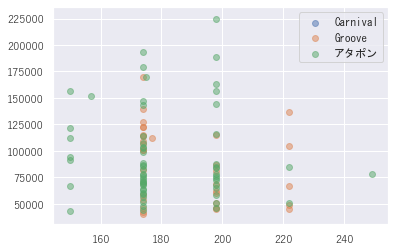

In [18]:
# 期間vs2001位ボーダー
# 形式ごとに色分けしてプロット
events = df['形式'].unique()
fig = plt.figure()
ax = fig.add_subplot(111)

for event in events:
    x = df.loc[df['形式'] == event, '期間']
    y = df.loc[df['形式'] == event, '2001位']
    ax.scatter(x, y, label=event, alpha=0.5)
    
ax.legend(prop={"family":"MS Gothic"})
plt.show()

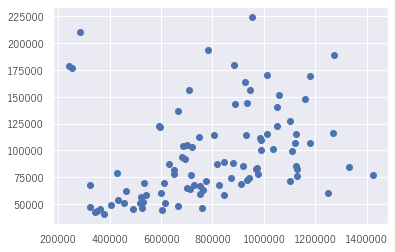

In [19]:
# 1位vs2001位ボーダー
fig = plt.figure()
ax = fig.add_subplot(111)
x = df.loc[:, '1位']
y = df.loc[:, '2001位']
ax.scatter(x, y)
plt.show()

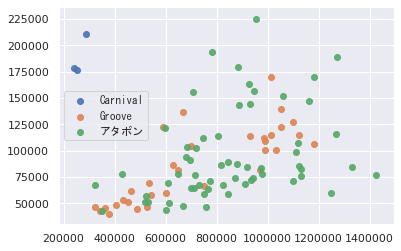

In [7]:
# 1位vs2001位ボーダー
# 期間vs2001位ボーダー
# 形式ごとに色分けしてプロット
events = df['形式'].unique()
fig = plt.figure()
ax = fig.add_subplot(111)

for event in events:
    x = df.loc[df['形式'] == event, '1位']
    y = df.loc[df['形式'] == event, '2001位']
    ax.scatter(x, y, label=event, alpha=0.9)
    
ax.legend(prop={"family":"MS Gothic"})
plt.show()

### 日付

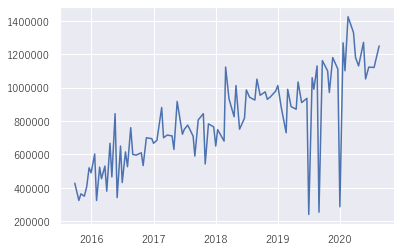

In [20]:
# 日付vs1位ボーダー
# だんだん上がっているように見える
fig = plt.figure()
ax = fig.add_subplot(111)
x = df.sort_values('日付').loc[:, '日付']
y = df.sort_values('日付').loc[:, '1位']
# ax.scatter(x, y)
ax.plot(x, y)
plt.show()

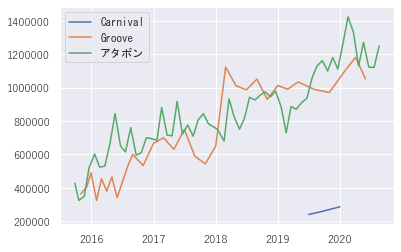

In [21]:
# 日付vs1位ボーダー
# 形式ごとに色分けしてプロット
events = df['形式'].unique()
fig = plt.figure()
ax = fig.add_subplot(111)

for event in events:
    x = df.loc[df['形式'] == event, '日付']
    y = df.loc[df['形式'] == event, '1位']
    # ax.scatter(x, y, label=event)
    ax.plot(x, y, label=event)
    
ax.legend(prop={"family":"MS Gothic"})
plt.show()

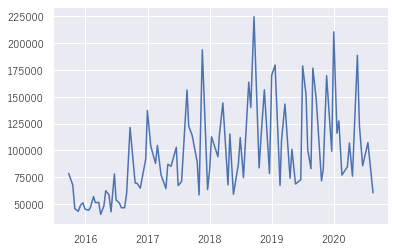

In [22]:
# 日付vs2001位ボーダー
# だんだん上がっているように見える
fig = plt.figure()
ax = fig.add_subplot(111)
x = df.sort_values('日付').loc[:, '日付']
y = df.sort_values('日付').loc[:, '2001位']
# ax.scatter(x, y)
ax.plot(x, y)
plt.show()

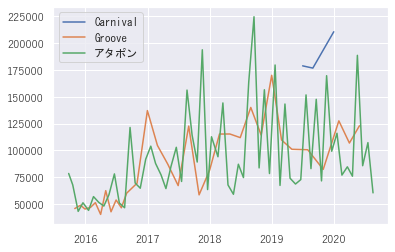

In [23]:
# 日付vs2001位ボーダー
# 形式ごとに色分けしてプロット
# アタポンのばらつきが大きい
events = df['形式'].unique()
fig = plt.figure()
ax = fig.add_subplot(111)

for event in events:
    x = df.loc[df['形式'] == event, '日付']
    y = df.loc[df['形式'] == event, '2001位']
    # ax.scatter(x, y, label=event)
    ax.plot(x, y, label=event)
    
ax.legend(prop={"family":"MS Gothic"})
plt.show()

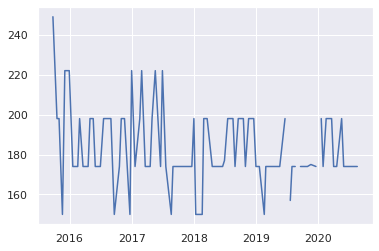

In [9]:
# 日付vs期間
# 2018年以降は200以下
fig = plt.figure()
ax = fig.add_subplot(111)
x = df.sort_values('日付').loc[:, '日付']
y = df.sort_values('日付').loc[:, '期間']
ax.plot(x, y)
plt.show()

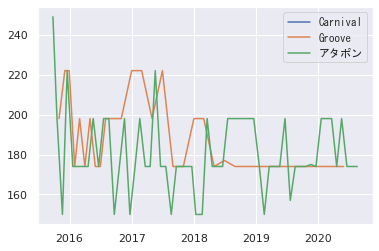

In [11]:
# 日付vs期間
# 日付vs2001位ボーダー
# 形式ごとに色分けしてプロット
# アタポンのばらつきが大きい
events = df['形式'].unique()
fig = plt.figure()
ax = fig.add_subplot(111)

for event in events:
    x = df.sort_values('日付').loc[df['形式'] == event, '日付']
    y = df.sort_values('日付').loc[df['形式'] == event, '期間']
    ax.plot(x, y, label=event)
    
ax.legend(prop={"family":"MS Gothic"})
plt.show()

## メモ

* 形式
  * Carnivalはデータ数少ないから分析は厳しい
  * まずはデータ数が一番多いアタポンから手を付けるのが良さそう
* 属性
  * 大きな傾向の違いはなさそう
  * 属性があるのはGrooveのみ
* 期間
  * 期間が長いほどボーダーが高いかと思ったが、そうでもなかった
  * 関係性ゼロではないと思うが、他の要因のほうが強いのかも
* 日付
  * 傾向として、だんだん上がってるように見える
  * 思いつく仮説は以下
    * プレイヤーが増えて争いが激しくなってる
    * イベント効率が上がっている
      * キャラ性能の向上
      * 楽曲、モード（グランドライブなど）の追加
* その他考えられる要因
  * イベント毎のバラつき
    * イベントの盛り上がり具合（イベント報酬の魅力に伴う、ユーザのやる気）
  * ゲーム内の変化
    * キャラが増えてきて、放置編成しやすくなったあ
    * グランドライブができて、時間効率が上がった